1. Data Preparation:
Download and explore the US Superstore data.
Perform basic data cleaning and preprocessing.


2. Data Visualization with Matplotlib:
Create an interactive line chart to show sales trends over the years.
Build an interactive map to visualize sales distribution by country.


3. Data Visualization with Seaborn:
Use Seaborn to generate a bar chart showing top 10 products by sales.
Create a scatter plot to analyze the relationship between profit and discount.


4. Comparative Analysis:
Compare the insights gained from Matplotlib and Seaborn visualizations.
Document your observations about the ease of use and effectiveness of both tools.


5. Code and Insights:
Write clear, well-documented Python code.
Include your analysis and insights as comments or markdown cells in your Jupyter notebook.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try:
 df=pd.read_excel("12.xls")
except FileNotFoundError:
  print("File not found. Please check the file path.")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
print(df.isnull().sum())
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())
print(f"Number of duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()
try:
    df['Order Date'] = pd.to_datetime(df['Order Date'])
except KeyError:
    print("'Order Date' column not found. Skipping datetime conversion.")
except Exception as e:
    print(f"Error converting 'Order Date': {e}")
try:
    df = df.drop('Row ID', axis=1)
except KeyError:
    print("'Row ID' column not found. Skipping removal.")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in '{col}': {df[col].unique()}")
print(df.head())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
Number of duplicate rows: 0
Unique values in 'Order ID': ['CA-2016-152156' 'CA-2016-138688' 'US-2015-108966' ... 'CA-2014-110422'
 'CA-2017-121258' 'CA-2017-119914']
Unique values in 'Ship Mode': ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Unique values in 'Customer ID': ['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'HP-14815' 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065'
 'EB-13870' 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710'
 'LC-16930' 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900'
 'DP-13000' 'JM-15265' 'TB-21055'

In [8]:
import plotly.express as px
if not pd.api.types.is_datetime64_any_dtype(df['Order Date']):
    try:
        df['Order Date'] = pd.to_datetime(df['Order Date'])
    except (KeyError, ValueError) as e:
        print(f"Error converting 'Order Date': {e}")
        exit()
fig = px.line(df, x='Order Date', y='Sales', title='Sales Trends Over Time')
fig.update_layout(xaxis_title='Order Date', yaxis_title='Sales')
fig.update_traces(line=dict(color='blue', width=2))
fig.show()

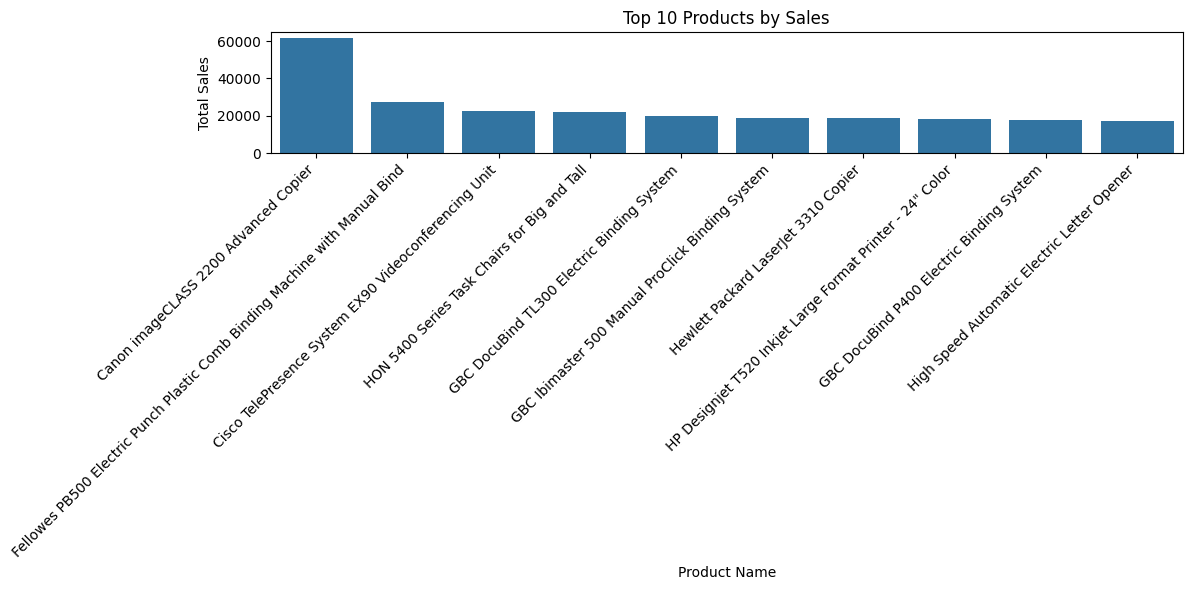

In [10]:
top_10_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Name', y='Sales', data=top_10_products)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()
sns.pairplot(df)
plt.show()

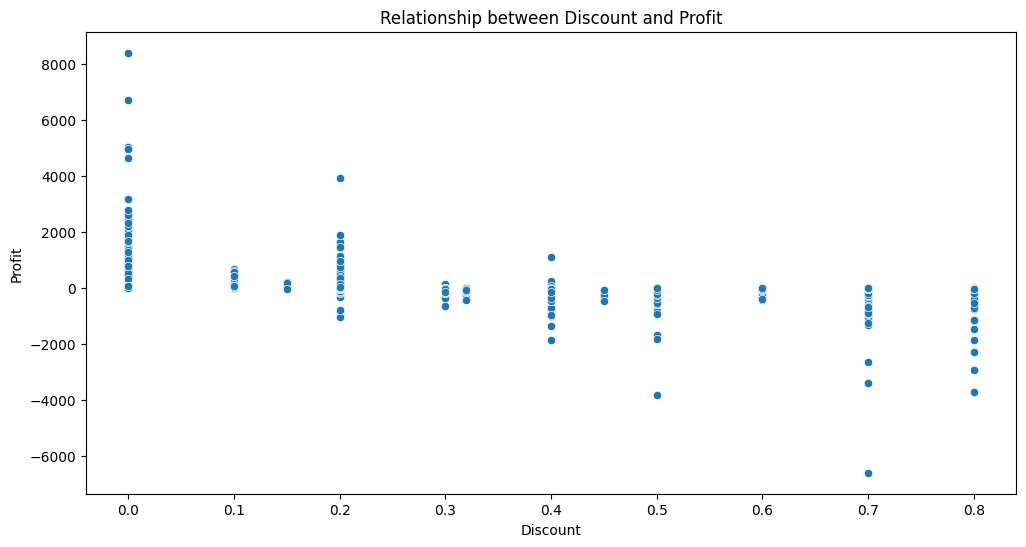

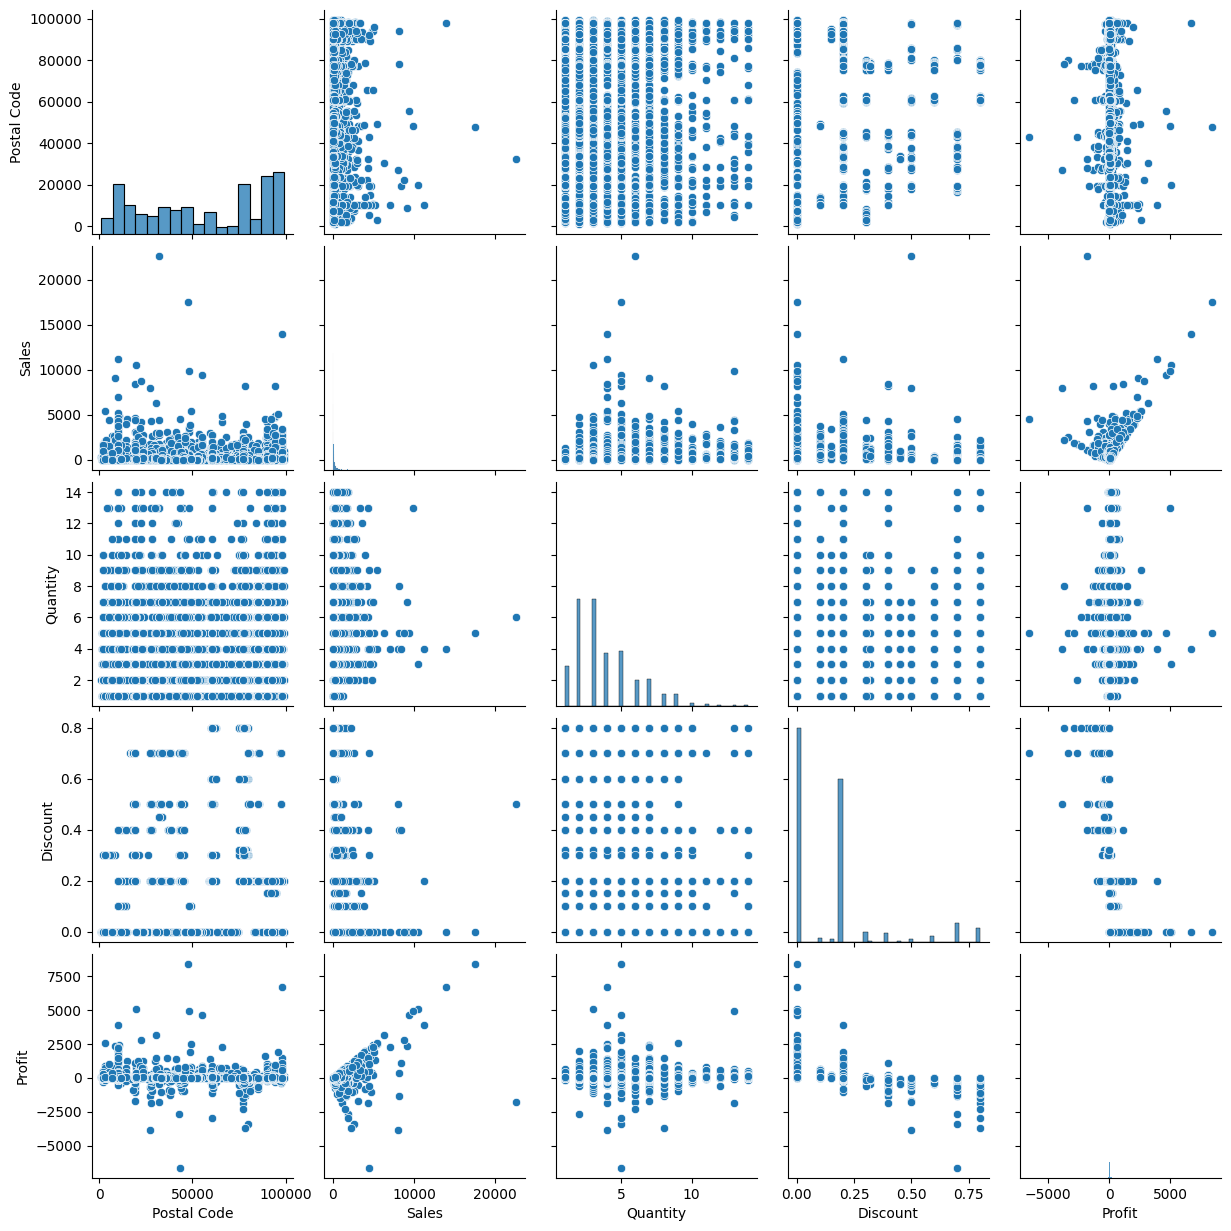

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Relationship between Discount and Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()
sns.pairplot(df)
plt.show()

In [ ]:
# Comparative Analysis:

# Matplotlib:
# Insights: Matplotlib offers fine-grained control over plot elements, allowing for precise customization.
# The line chart effectively visualizes sales trends over time.
# Ease of Use:  For simple plots, Matplotlib is straightforward. However, creating complex or
# interactive visualizations can be more verbose compared to Seaborn or Plotly.
#Effectiveness:  Effective for basic plots and situations requiring high customization, but can be less
# efficient for quick exploratory data analysis due to the need for more code.


# Seaborn:
# Insights: Seaborn excels at statistical visualizations. The bar chart clearly highlights top-selling
# products. The scatter plot effectively reveals the relationship between discount and profit.  Pairplot provides
# a quick overview of relationships between numerical variables.
#Ease of Use: Seaborn's higher-level functions simplify the creation of statistically informative plots,
# making it easier and faster for exploratory data analysis.
# Effectiveness: Very effective for exploring relationships in data, identifying trends, and creating
# visually appealing statistical graphics. More efficient for initial exploration compared to Matplotlib.

# General Comparison:

# Seaborn often provides a quicker path to insightful visualizations, especially for exploratory data analysis.
# Its higher-level functions abstract away much of the lower-level plotting details, simplifying the process.
# Matplotlib provides more control over plot aesthetics and individual elements.  When fine-grained customization
# is needed, Matplotlib becomes the preferred tool.  For interactive visualizations, Plotly is generally the best
# choice.  Consider your specific needs when choosing a visualization library.  If you need to quickly generate informative
# statistical plots, use Seaborn; if you need to customize every detail of a plot, use Matplotlib; if you need
# interactive plots, use Plotly.
